<a href="https://colab.research.google.com/github/CruxTemplar/COMP726-Tutorial-Exercises/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 3

##Question 7
What are some examples of fungible tokens compared to non-fungible tokens that you use that are not blockchain related?

An example of a fungible token I can think of that is not blockchain related are in-game currencies that are purchaseable with real money. One example is [Bonds](https://www.runescape.com/bonds) from the online game Runescape that are paid with real money in order to recieve a 'token' in the game. The price for this differs depending on which currency you choose to pay with. Once bought, the token can then be traded with other players or used to purchase services or cosmetics in game. These tokens are considered fungible as they meet the criteria for fungible tokens; that is, they are identical, it contains a monetary value and their interchangability.

For an example of a non-fungible token, I have chosen a lottery ticket. Although lottery tickets are physically indistinguishable, each lottery ticket is uniquely different thanks to the different set of numbers which affects the barcode itself. Lottery tickets have a unique property where even if two lottery tickets contain the same combination of numbers, other information such as time of purchase, location of purchase and the draw number will impact what information the barcode is ready, thus making every lottery ticket unique and secure.

## Question 8

How much gas did you pay to deploy your contract? What are some implications of the gas auction fees model?

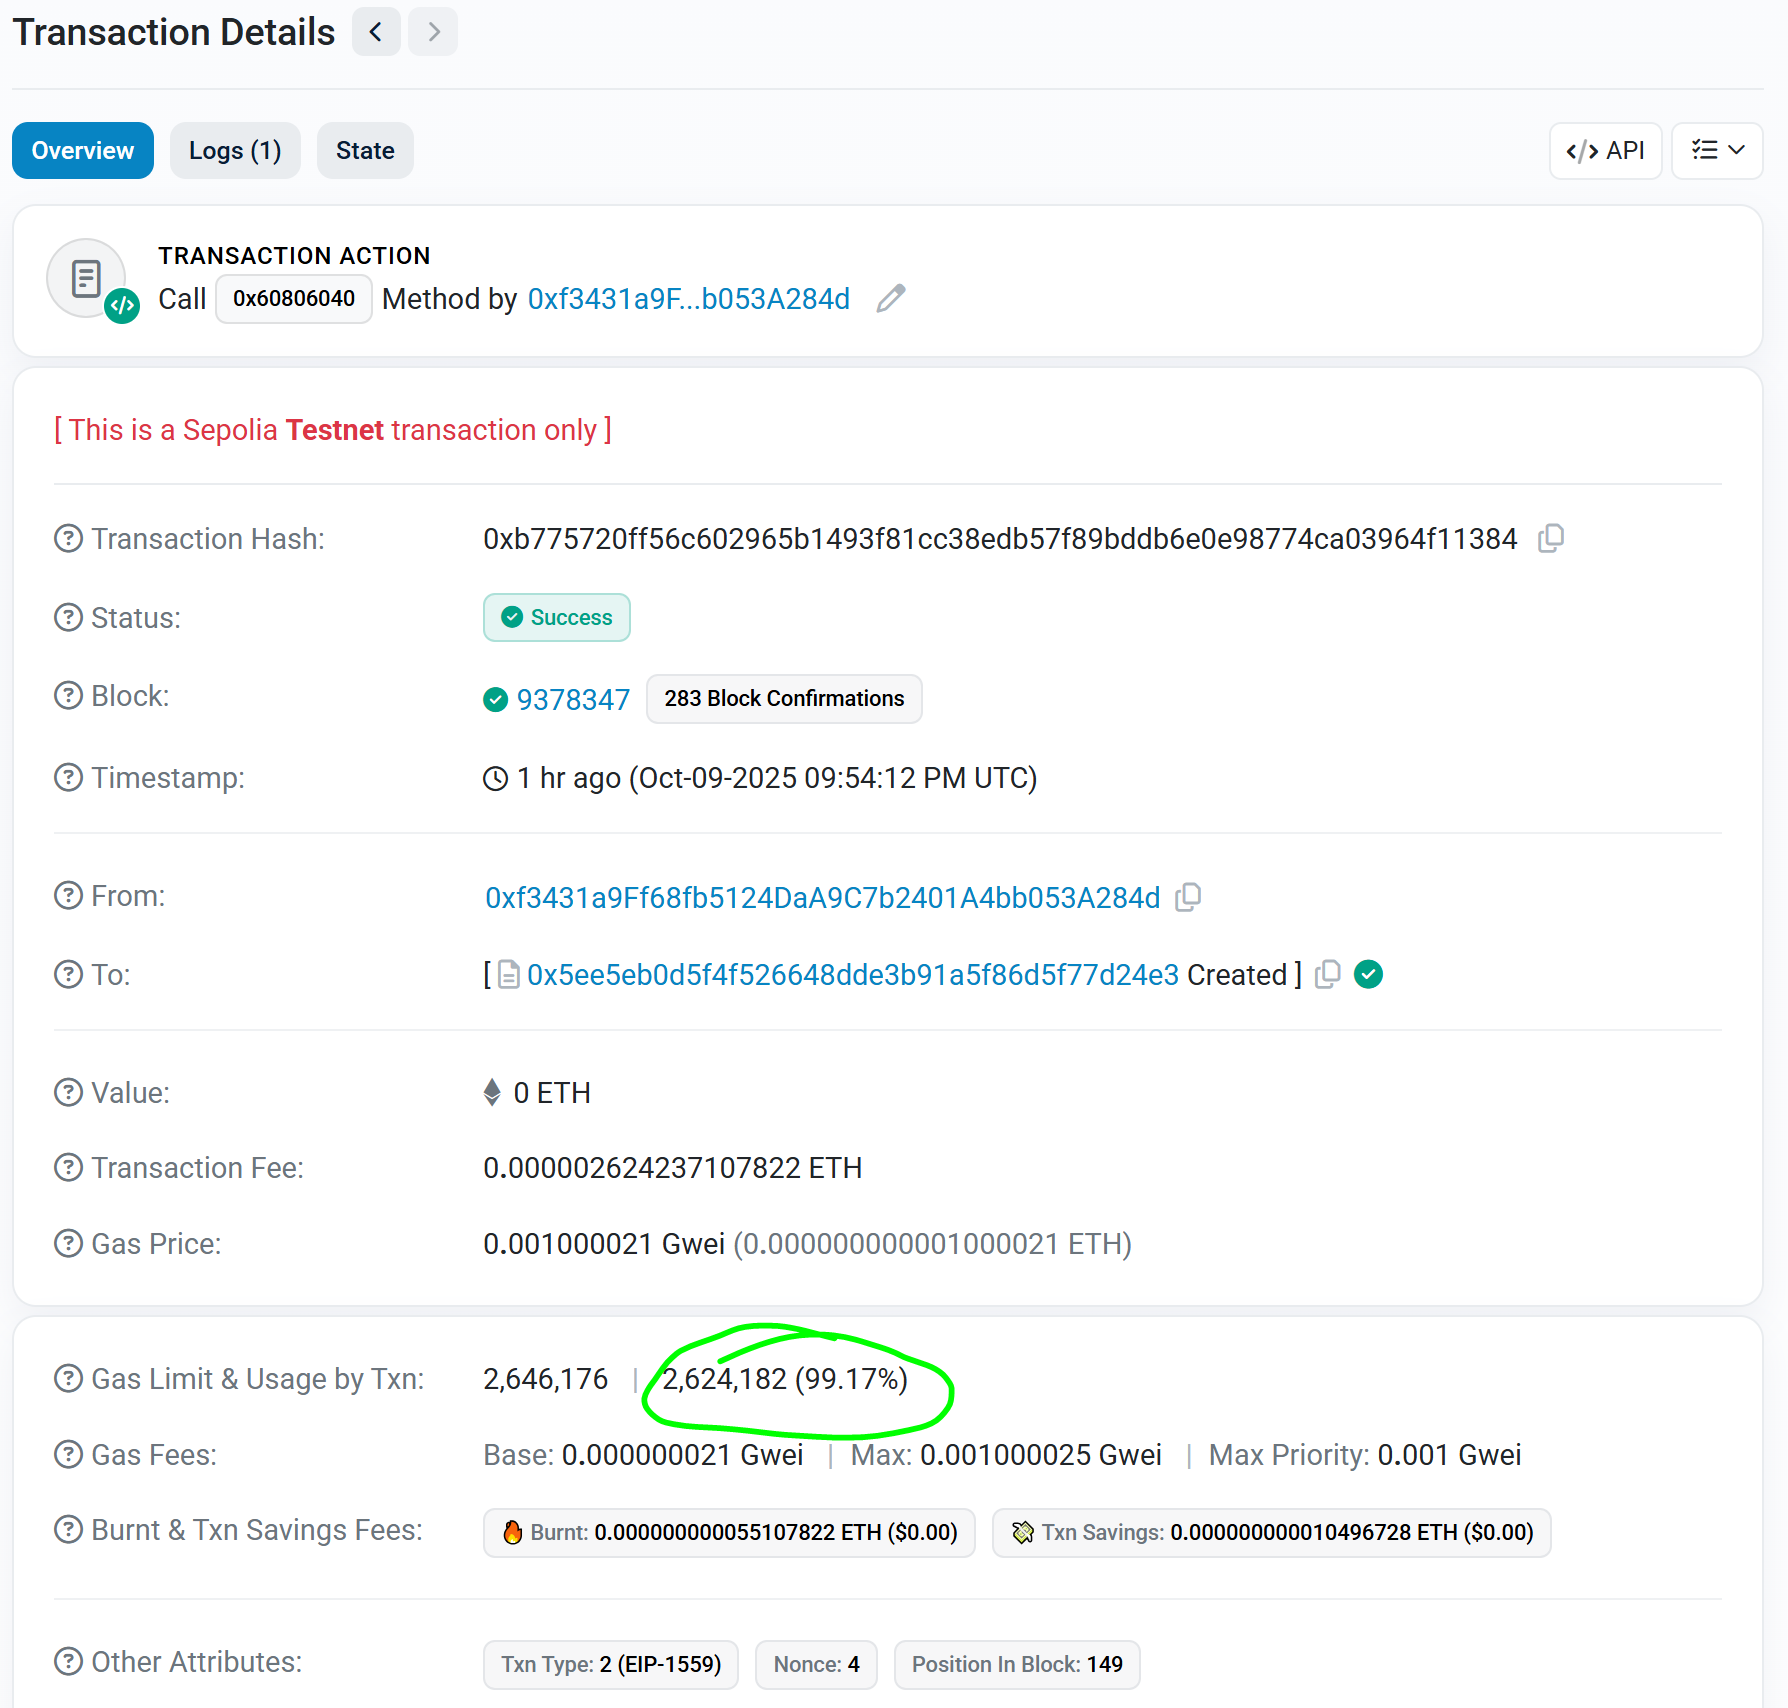

Looking at the above image, we can calculate the cost of the deployment. The transaction fee can be interpreted as the deployment cost as the transaction fee is the cost needed to deploy on the blockchain. We can also calculate this by taking the **Gas used** which is the right number in the row **Gas Limit & Usage** by Txn and multiplying this by the **Gas price**.

One impication of the gas auction fee model is that deployment costs are dependant on the network activity. If the network is busy to the point of congestion, the price of gas (or the deployment cost) goes up in order to supplement the demand. This is also reflective of the priority fee where users are able to pay extra gas for the miners to prioritize their transactions. The gas auction fee model also affects how users interact with their contracts. With high gas prices, users will be more mindful on how they can optimize their contracts by using less functions and taking less storage to lower their gas costs. These smaller contracts, in a large volume and congests the network, can become variably more expensive as time goes on.

## Question 9

Change the metadata and mint another NFT.

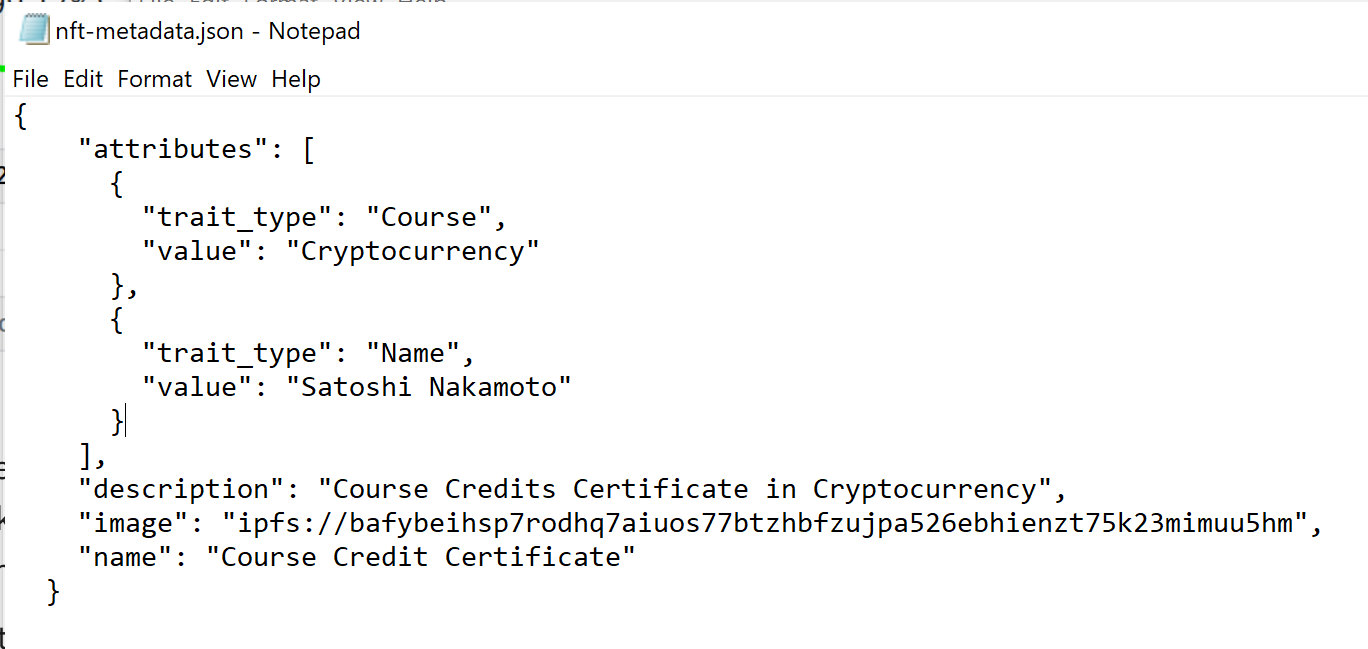

Using the Tutorial as the basis, I added another *trait_type* to the metadata. Lets call this: **Material**.

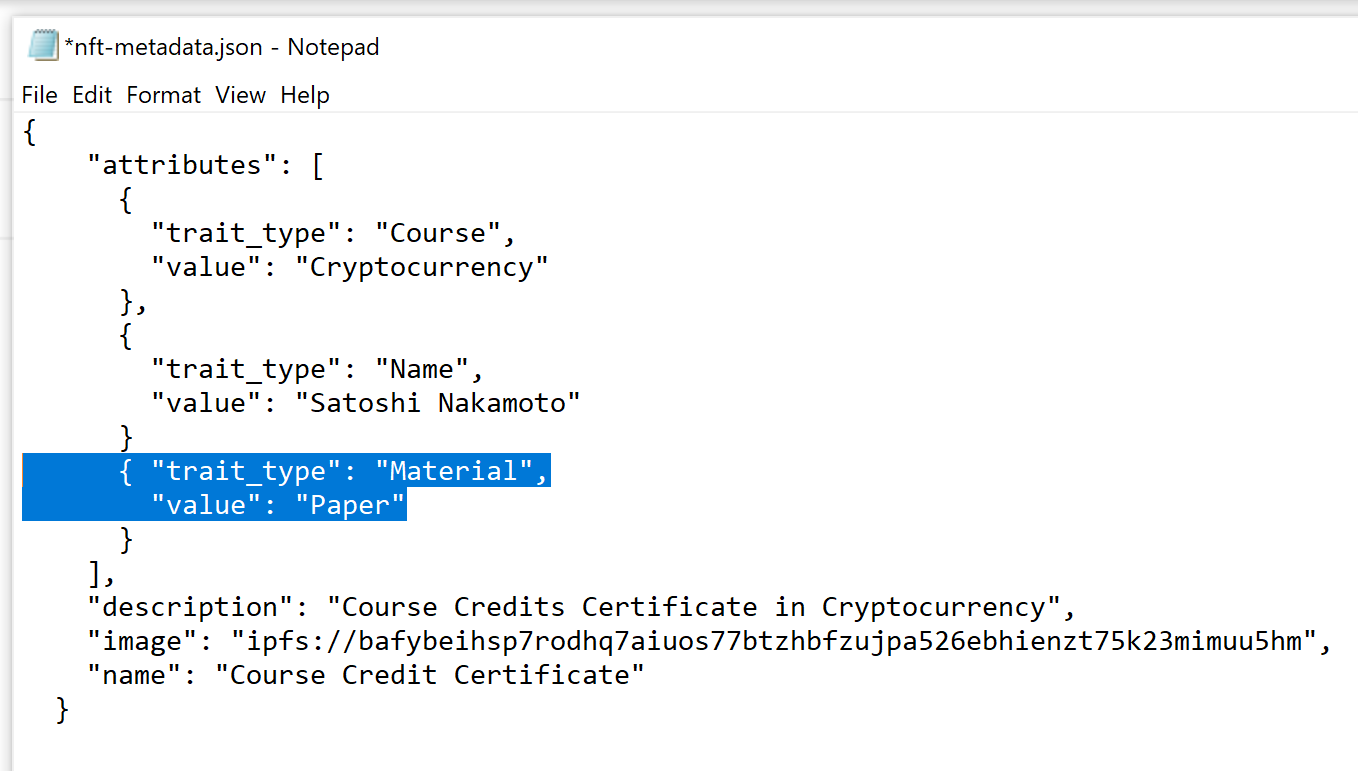

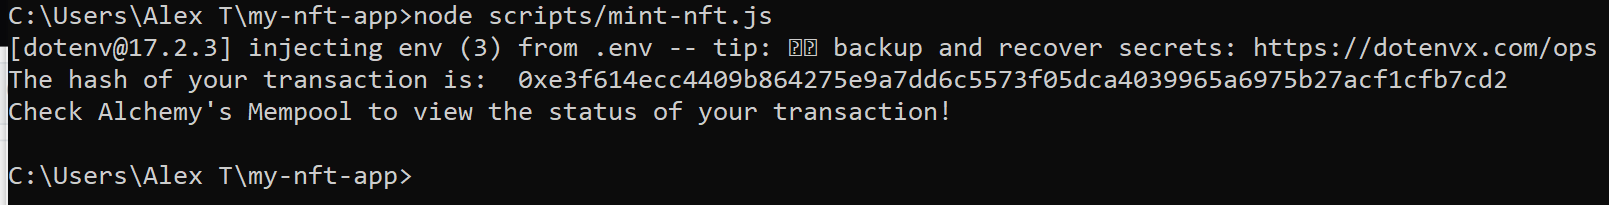

The NFT was successfully minted. Lets check it using Etherscan to track the hash transaction.

https://sepolia.etherscan.io/tx/0xe3f614ecc4409b864275e9a7dd6c5573f05dca4039965a6975b27acf1cfb7cd2

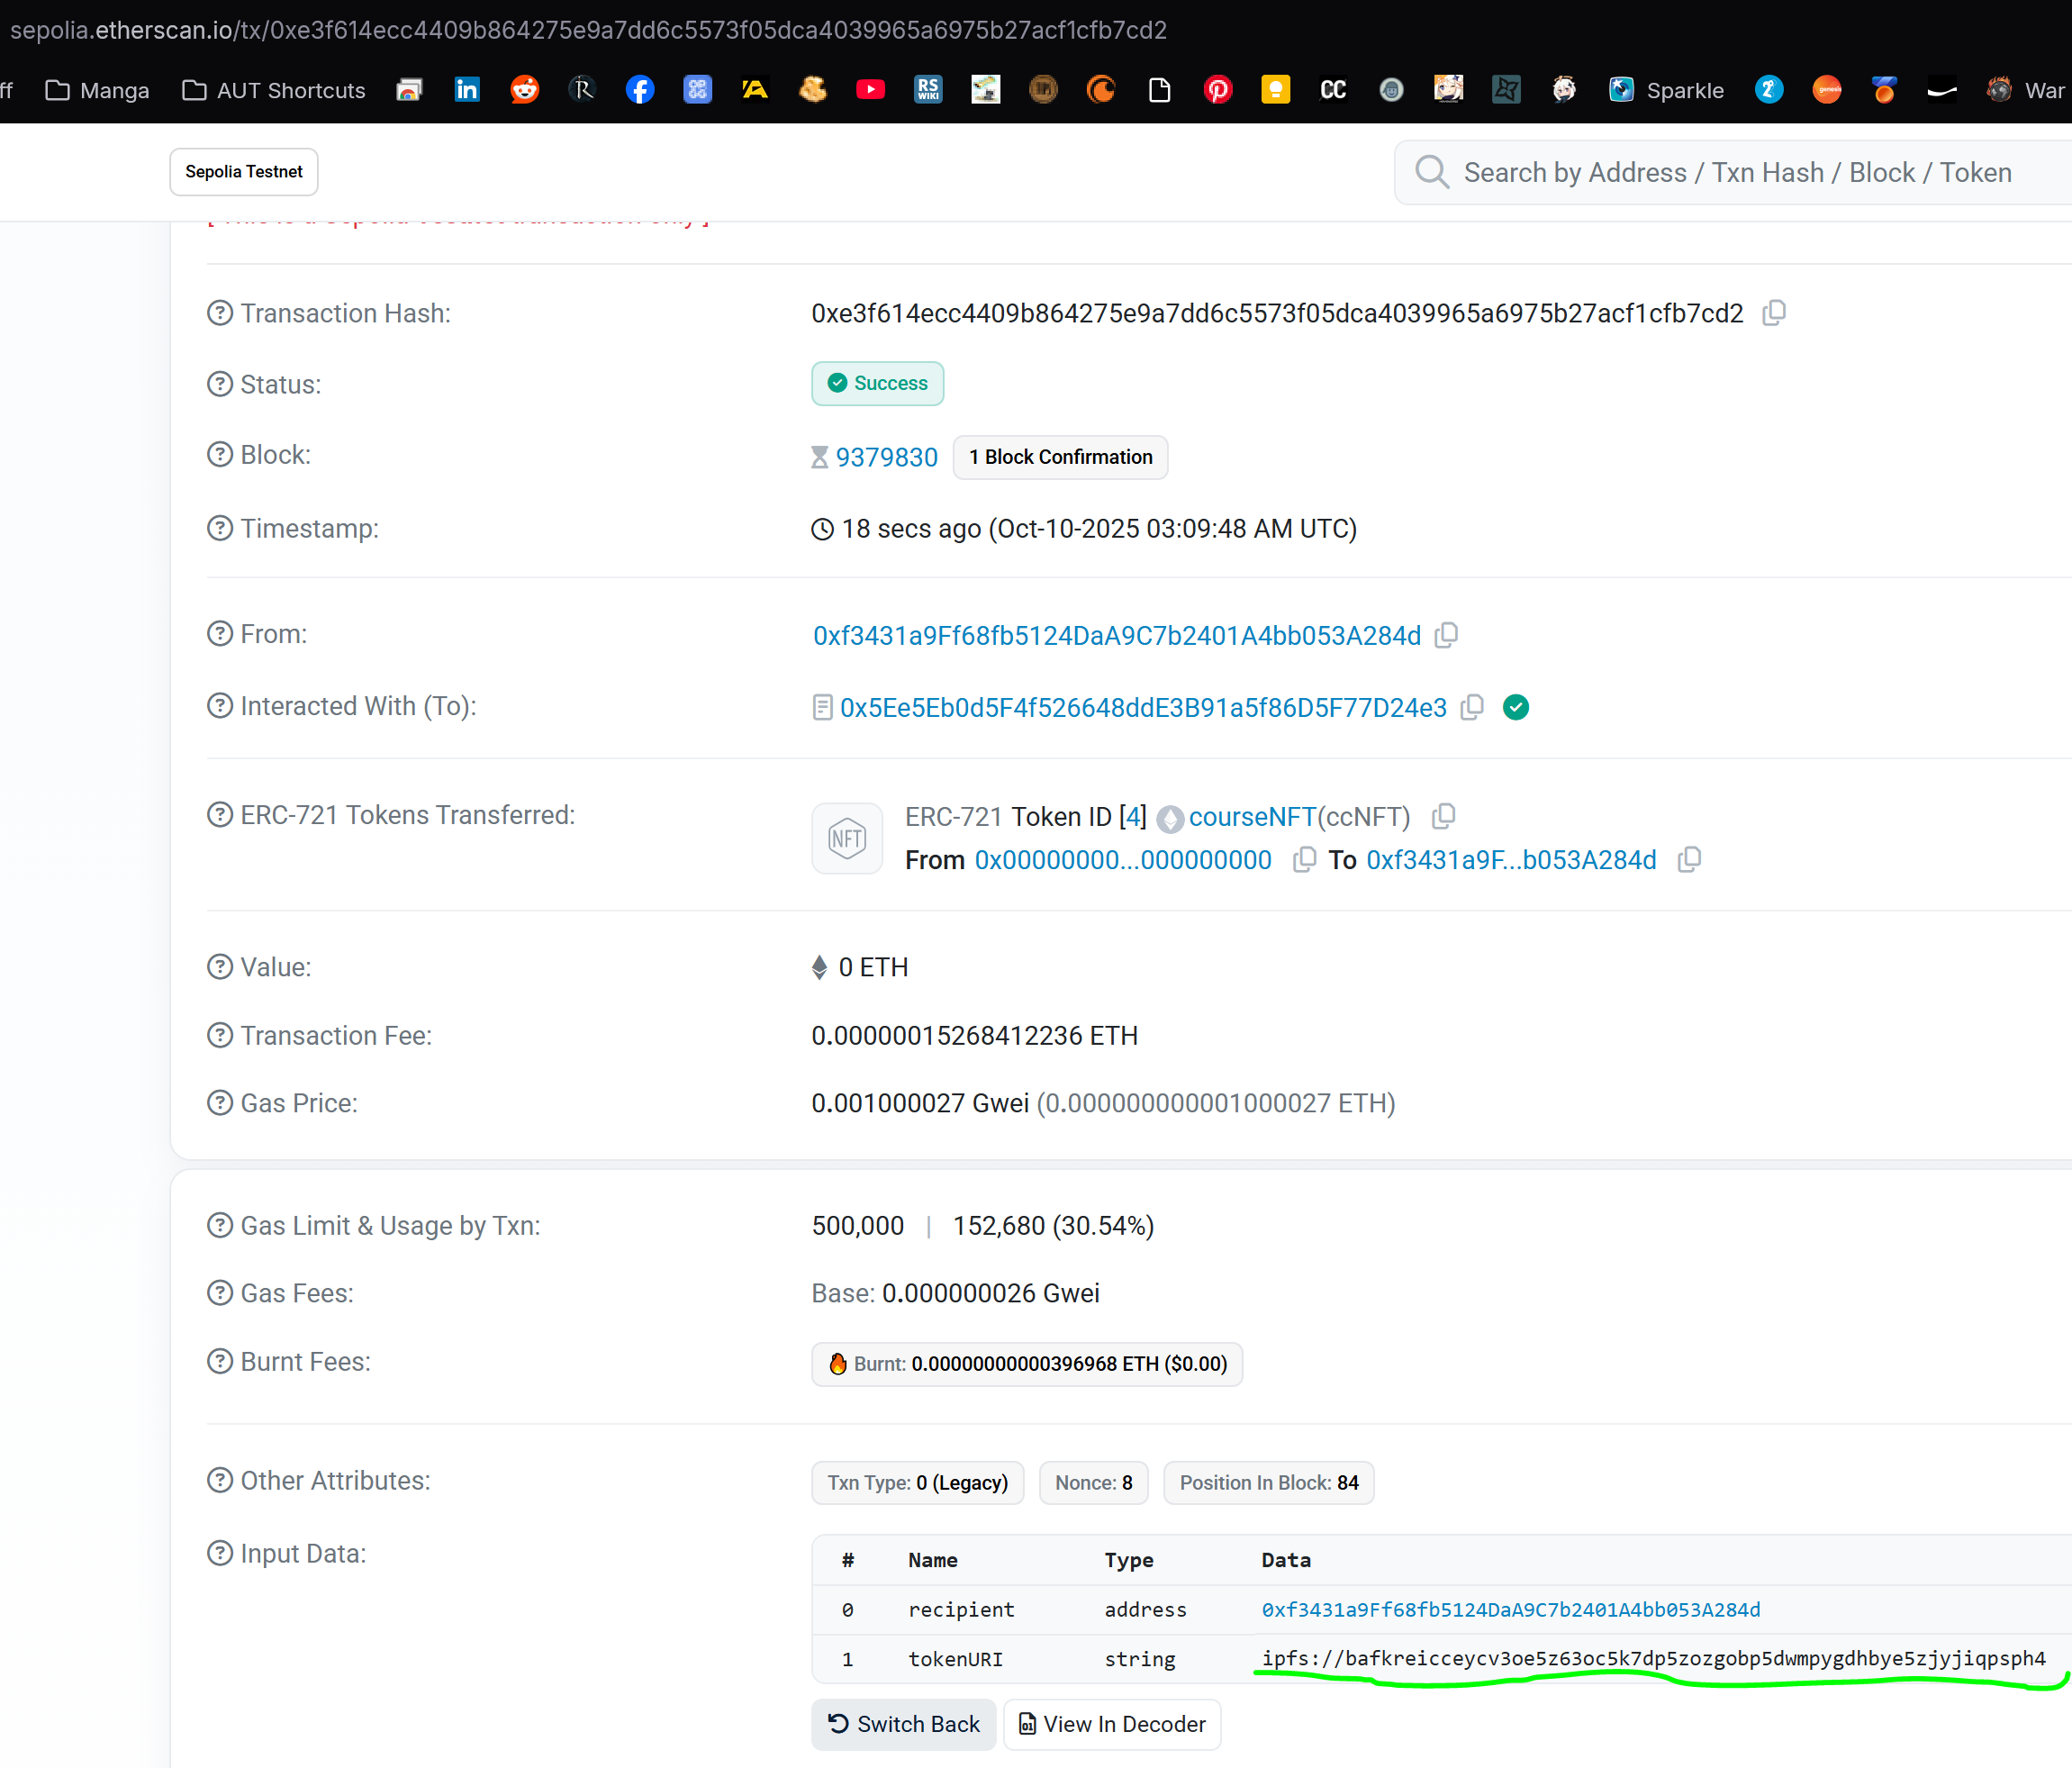

Once the **IPFS** string is located, we can supplement this into an IPFS Viewer:

https://ipfsviewer.com

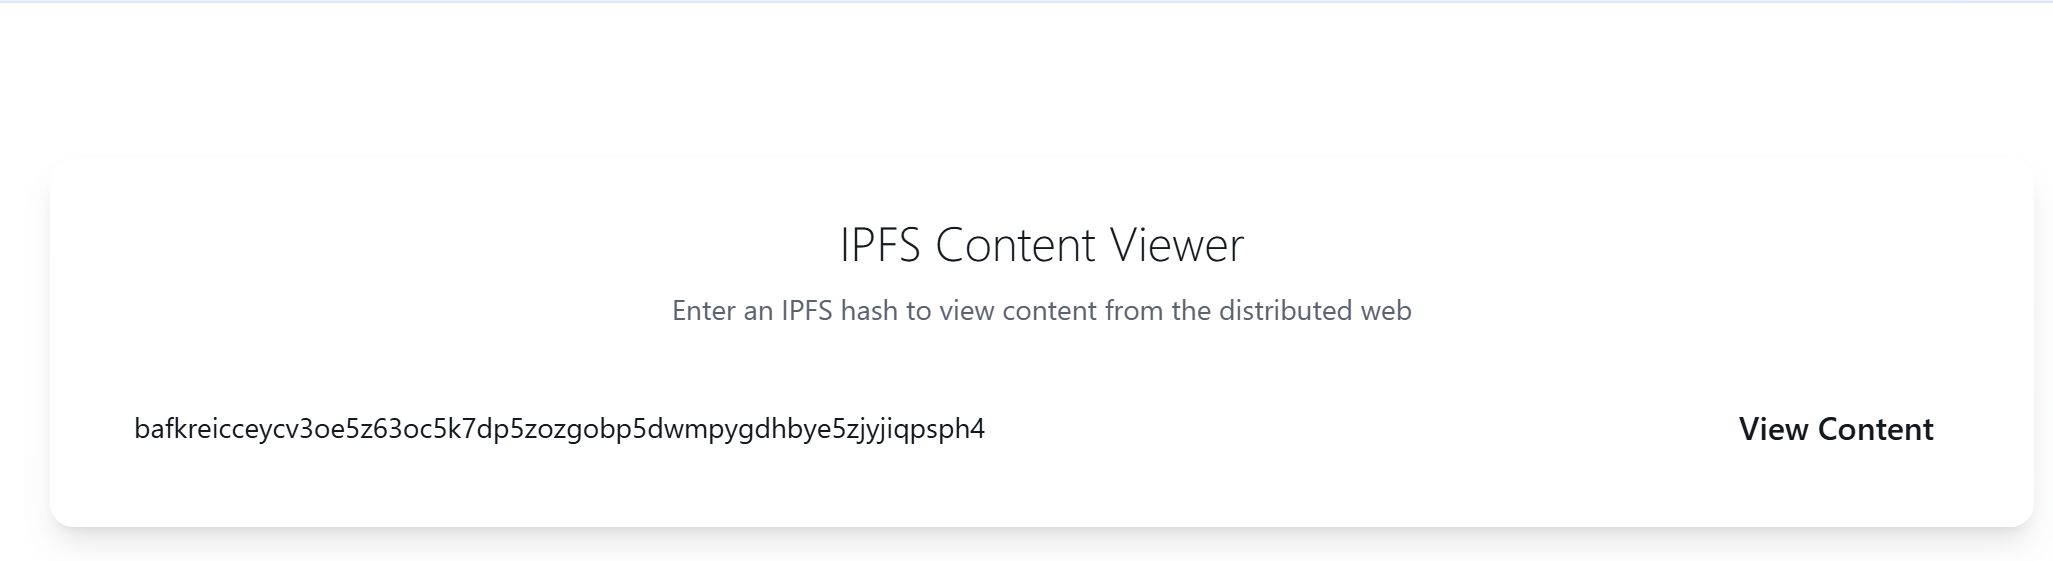

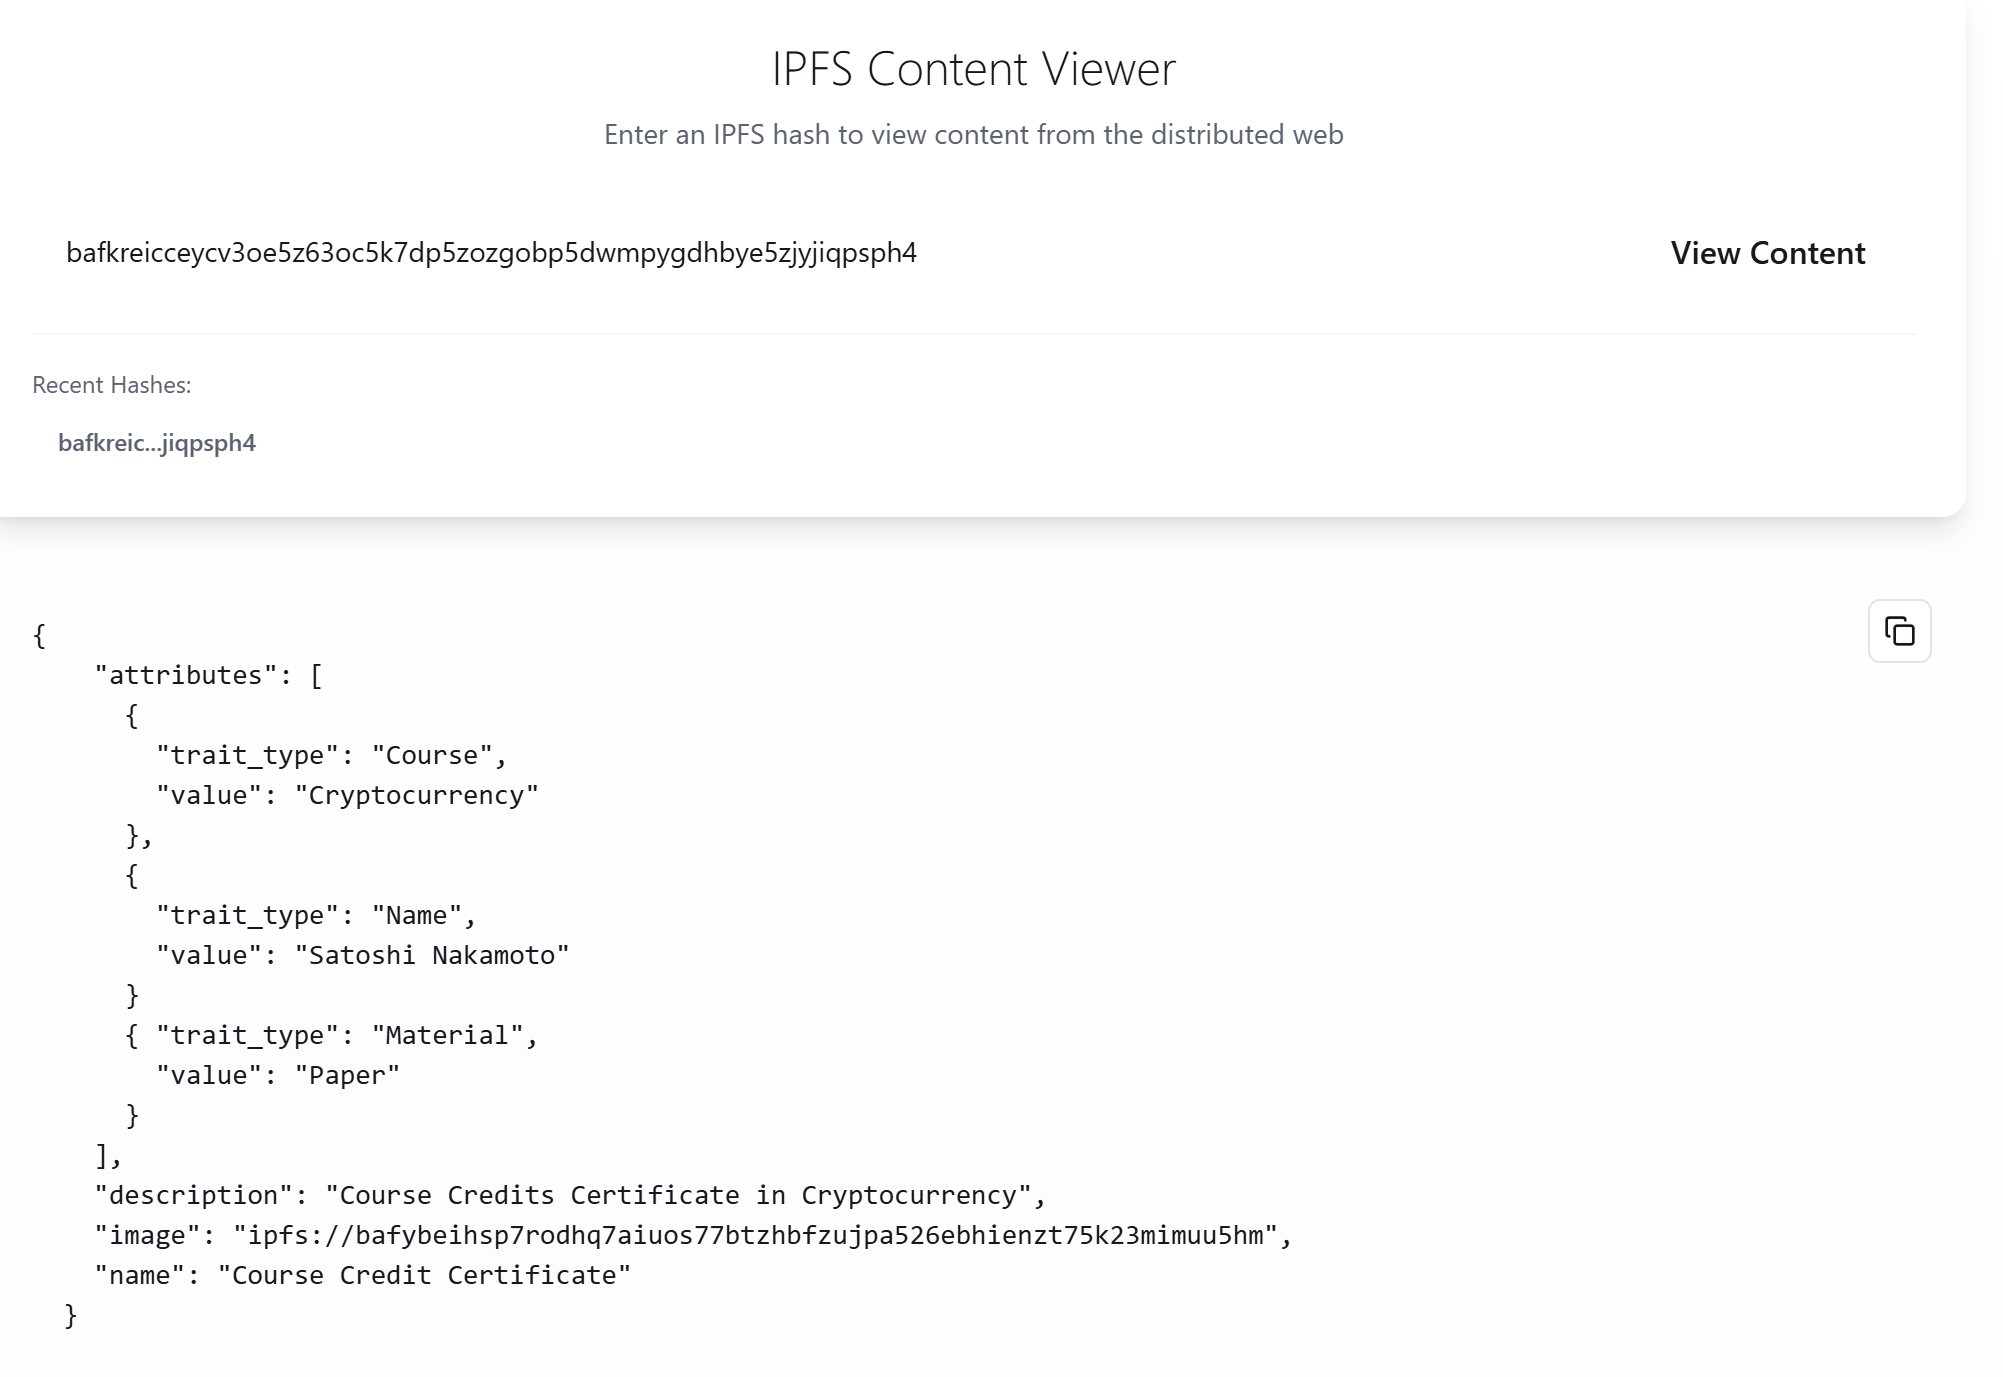

## Question 10

Write a script to generate a new random NFT every time *mint* is called.

To get started, we'll need to readjust the *mint-nft.js* file that was introduced in [Tutorial 10 - NFTs Part 2](https://github.com/aut-ss/COMP726/blob/2024-s2/tutorials/nft_2.md).

In [ ]:
require("dotenv").config()
const API_URL = process.env.API_URL
const PUBLIC_KEY = process.env.PUBLIC_KEY
const PRIVATE_KEY = process.env.PRIVATE_KEY

const { createAlchemyWeb3 } = require("@alch/alchemy-web3")
const web3 = createAlchemyWeb3(API_URL)

const contract = require("../artifacts/contracts/courseNFT.sol/courseNFT.json")
#Contract Address, hosting the smart contracts of the minted NFTs
const contractAddress = "0x5Ee5Eb0d5F4f526648ddE3B91a5f86D5F77D24e3"
const nftContract = new web3.eth.Contract(contract.abi, contractAddress)

#Defining the NFTs, indicated by their IPFS
const nftMetadataURIs = [
   #Icon of the weapon from World of Warcraft "Thunderfury, Blessed Blade of the Windwalker"
  "ipfs://bafkreibeh7wejl6kmpfhzfkn7d5cdkcah36ewacz3youzzva26lnxxd26i",
   #Powerpoint Presentation for Week 8's Topic - Introduction to Ethereum
  "ipfs://bafybeic7qefru4pfbrj6lxiu4u7fflmwqm2u2nznheeqhff3sfsedukgua",
   #Voucher for Buy One Get One Free for any Pepsi product
  "ipfs://bafybeigxj2sit23qetbysx5fqr3copygemu7x77c2gcxmavsl2w3qyk55u"
];

#Randomizer Function
function getRandomTokenURI() {
  const randomIndex = Math.floor(Math.random() * nftMetadataURIs.length);
  return nftMetadataURIs[randomIndex];
}

async function mintRandomNFT() {
    #Generate a random NFT each run
    const tokenURI = getRandomTokenURI();
    console.log(`Random token URI selected: ${tokenURI}`);

    const nonce = await web3.eth.getTransactionCount(PUBLIC_KEY, 'latest');

    const tx = {
        'from': PUBLIC_KEY,
        'to': contractAddress,
        'nonce': nonce,
        'gas': 500000,
        'data': nftContract.methods.mintNFT(PUBLIC_KEY, tokenURI).encodeABI()
    };

    #Readjusted console log, for error logging and successful attempts
    try {
    const signedTx = await web3.eth.accounts.signTransaction(tx, PRIVATE_KEY);
    const receipt = await web3.eth.sendSignedTransaction(signedTx.rawTransaction);
    console.log("Transaction successful! Hash:", receipt.transactionHash);
  } catch (err) {
    console.error("Error minting NFT:", err);
  }
}

mintRandomNFT()

and upload **three** different files for testing and comparision. Below we can see the Pinata IPFS as well as each of the three files's **CID** that are used to distinguish each file when randomized.

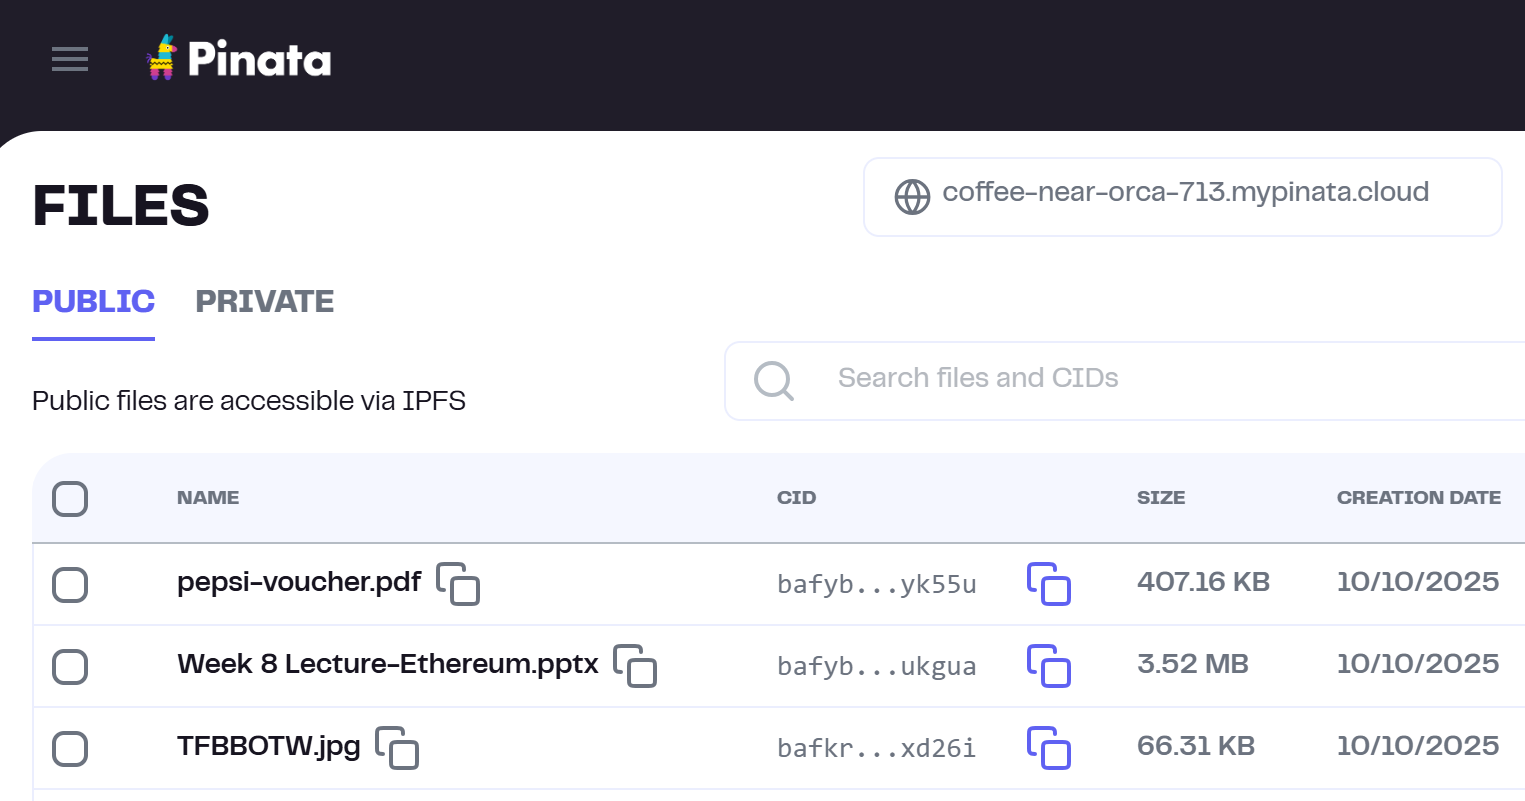

Running the *mint-nft.js* script through, results in a successful attempt.

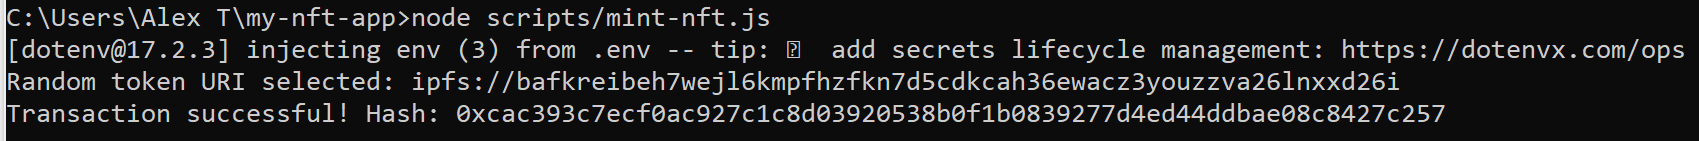

Here we can see the IPFS that was randomly chosen is using the CID of:

 **bafkreibeh7wejl6kmpfhzfkn7d5cdkcah36ewacz3youzzva26lnxxd26i**

 with a hash of:

 **0xcac393c7ecf0ac927c1c8d03920538b0f1b0839277d4ed44ddbae08c8427c257**

Lets run this two more times.

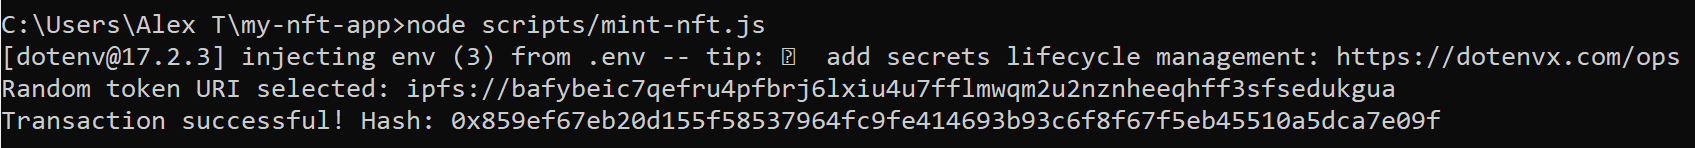

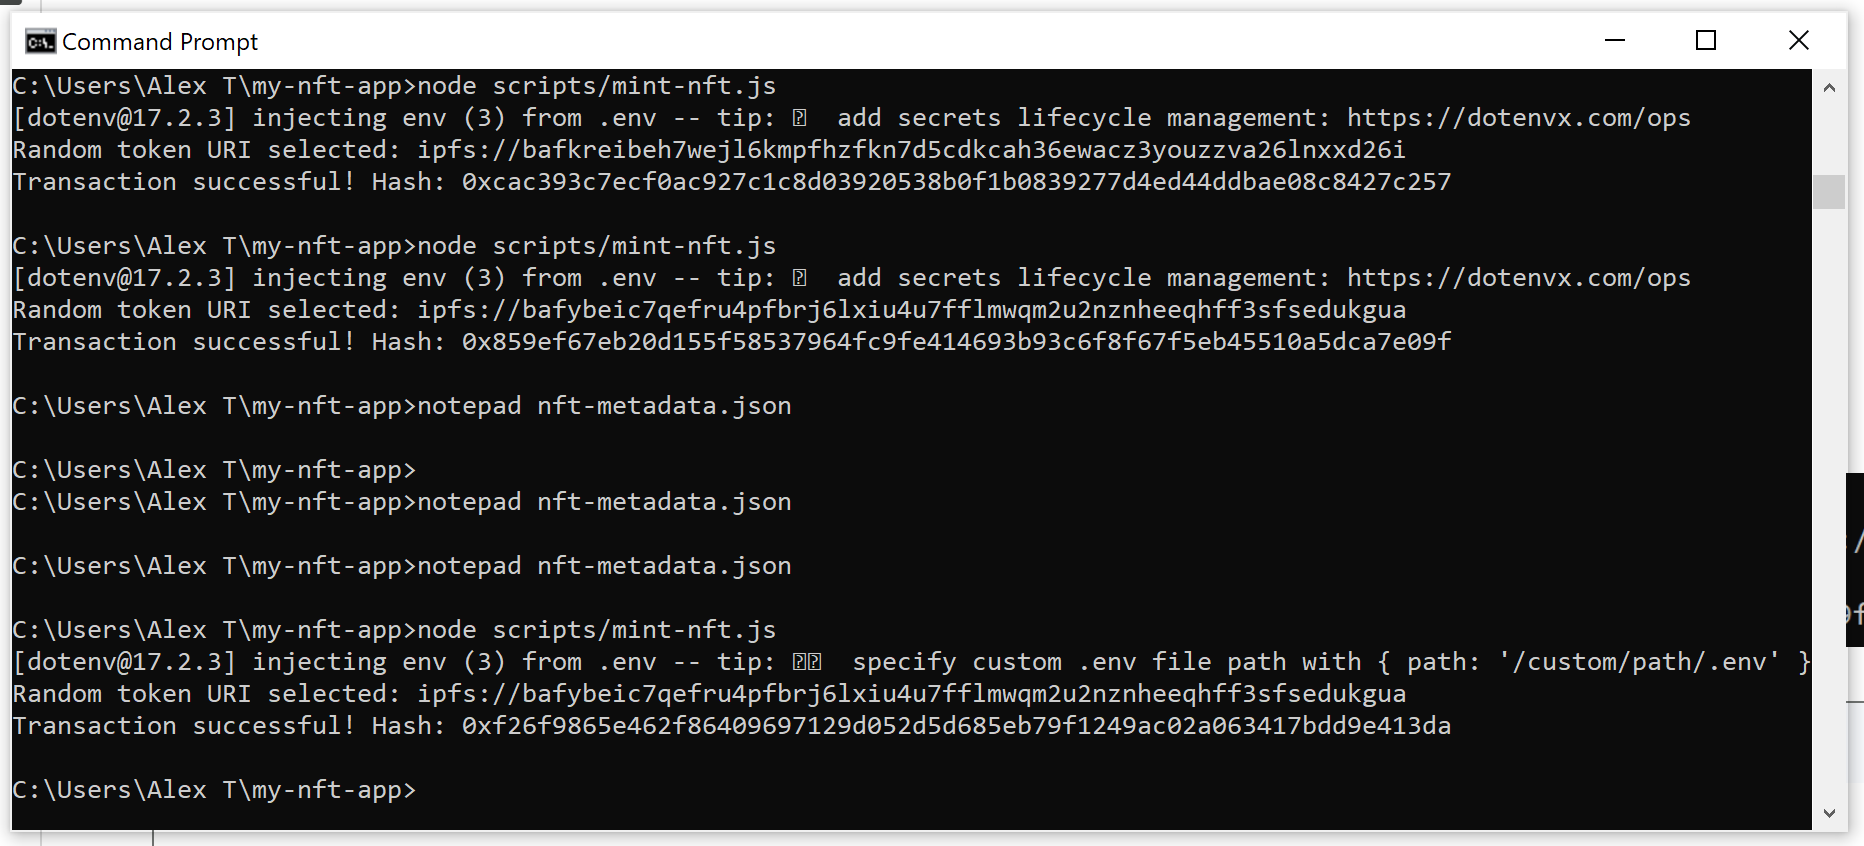

The third attempt resulted the randomizer picking the same NFT to mint twice. How unfortunate.

Lets check the Contract Address.

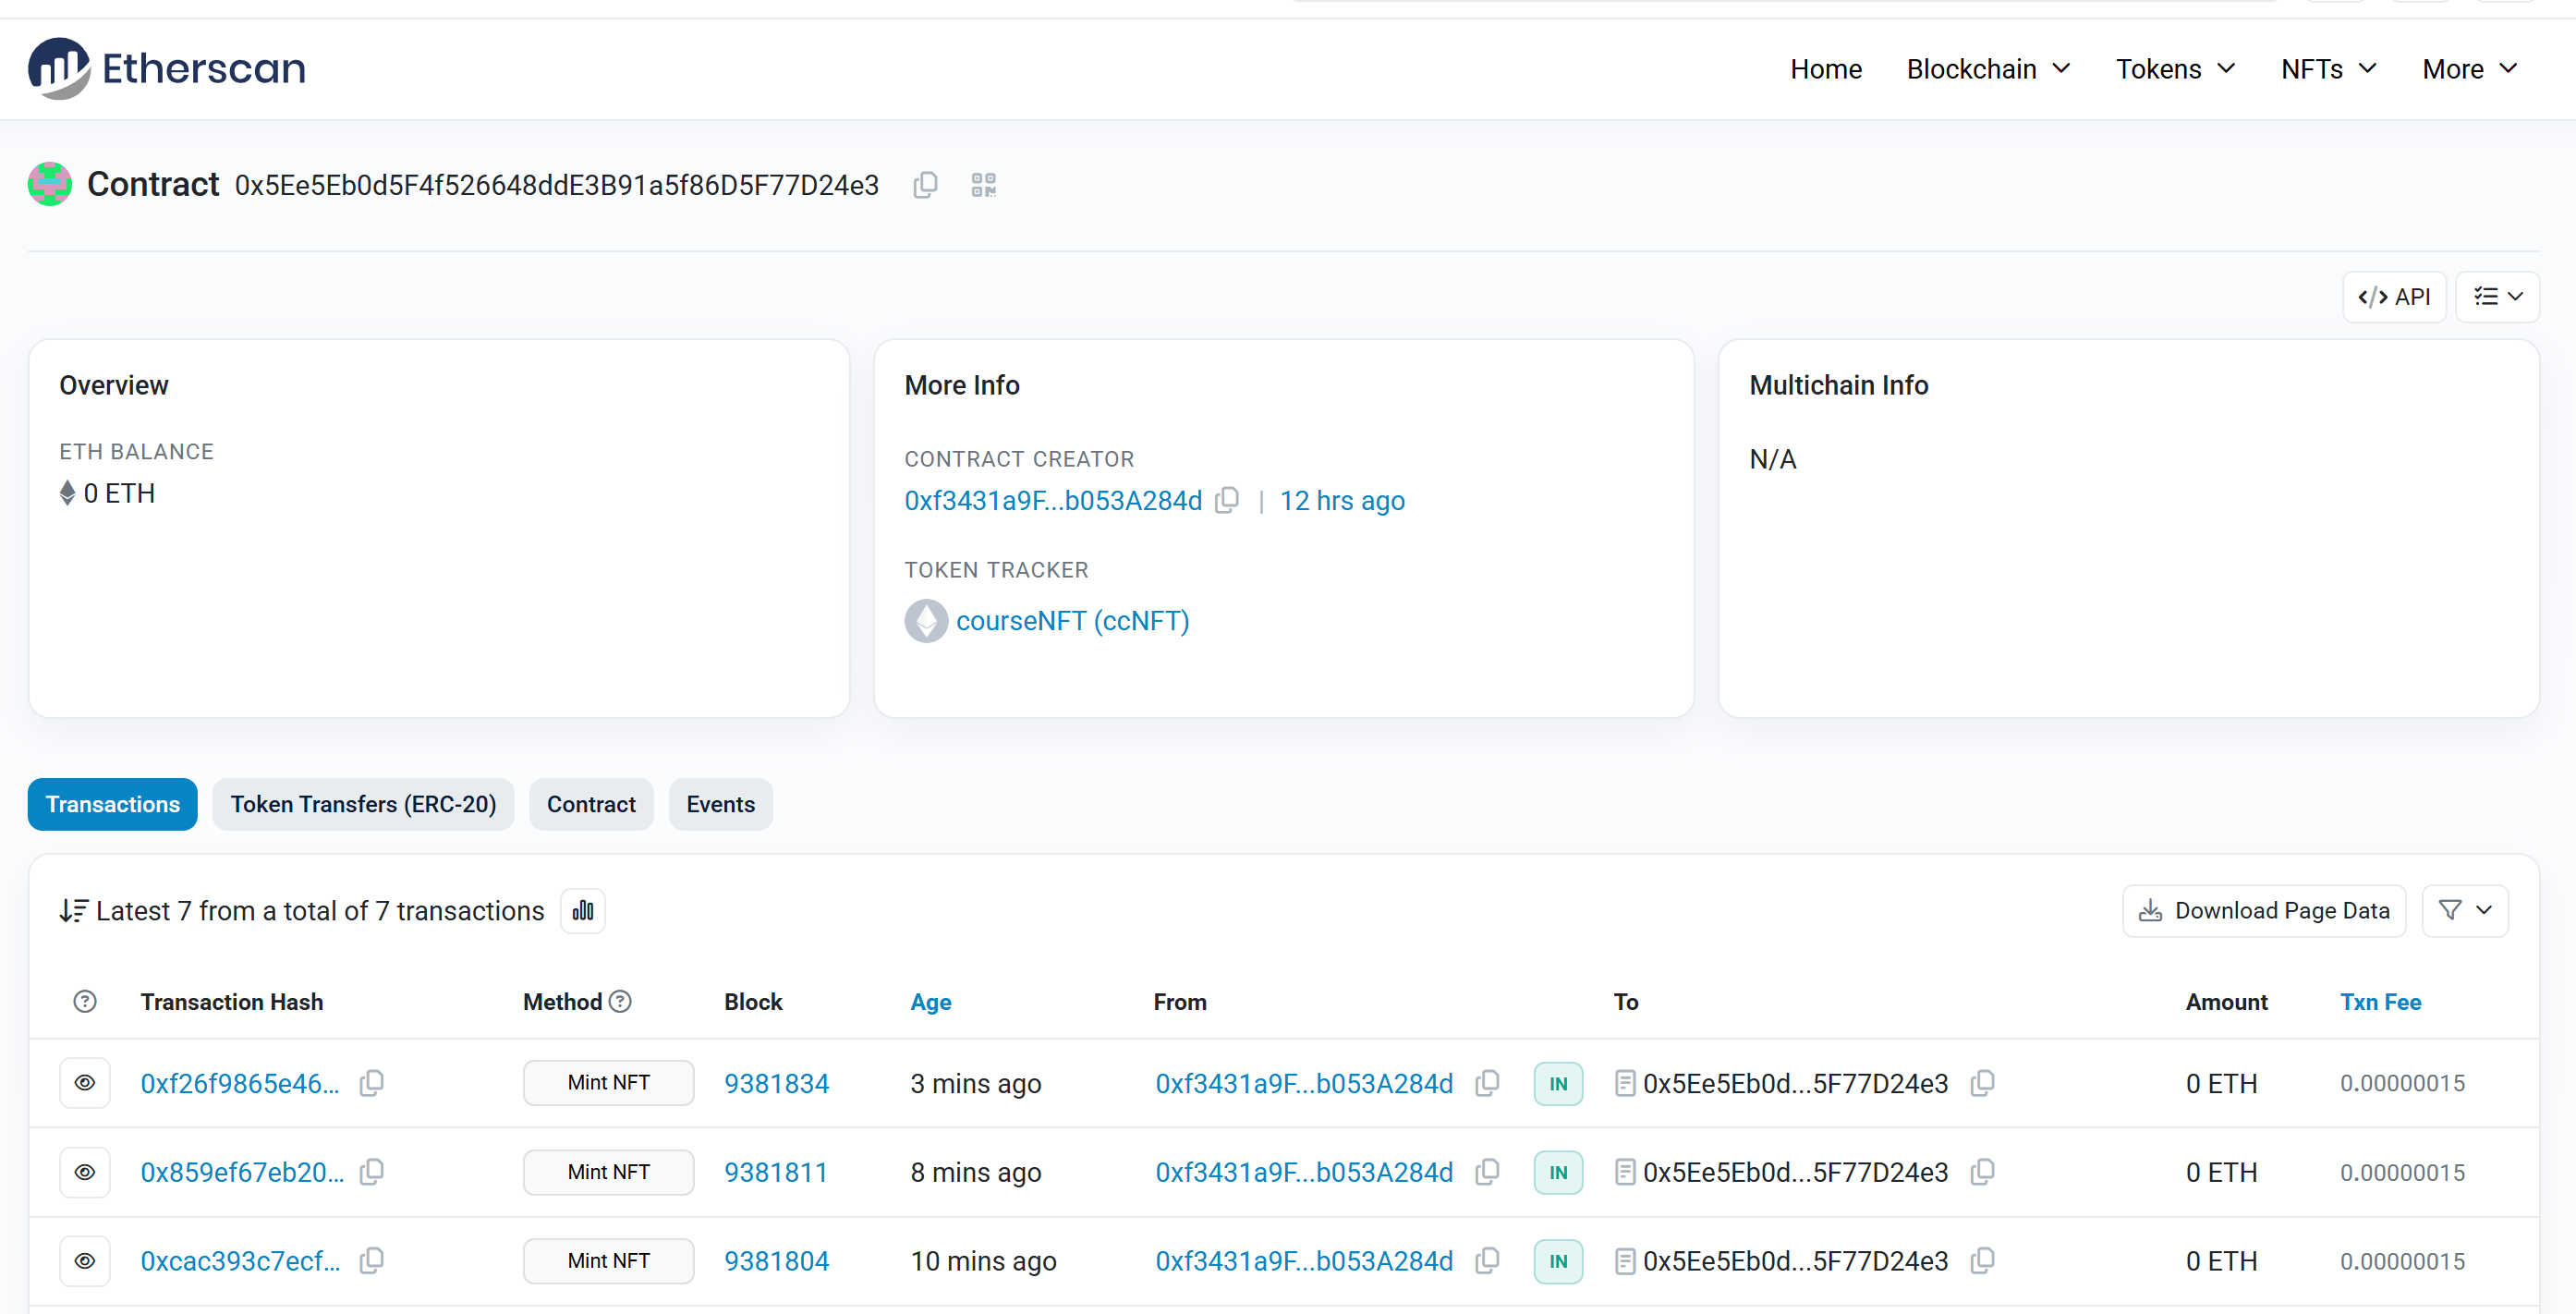

From this, we can see the unique transaction hashes for the last three times we ran the script.